<a href="https://colab.research.google.com/github/alialmulla97/PV-Energy-Output-Regression/blob/main/PV_Energy_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Photovoltaic Energy Output Predictor in Shagaya Renewable Energy Park

## The Challenge
As the world transitions toward renewable energy, Kuwait, an oil-rich nation, remains heavily reliant on non-renewable resources for electricity production, with a staggering 99.6% of its electricity coming from such sources. Only 0.4% of Kuwait's electricity is derived from renewable energy, specifically from the Shagaya Renewable Energy Park. This park integrates three renewable technologies: Concentrated Solar Power (CSP), Wind, and Photovoltaic (PV) systems.

This project focuses solely on the PV technology due to Kuwait's high solar irradiance, which provides more direct sunlight hours than the global average. Within PV, two distinct technologies are employed: polycrystalline panels with an installed capacity of 315W per panel (18,820 panels of model JKM315PP-72 from Jinko Solar) and thin film panels with an installed capacity of 160W per panel (34,560 panels of model SF160-S from Solar Frontier).

The primary goal of this project is to develop a predictive model for PV energy output based on forecasted weather data.

## Predictive Analytical Process
1. **Problem Definition**:  Identify and understand the problem, and determine the necessary requirements to develop a solution.
2. **Data Collection and Preperation**: Examine the dataset for missing or outlier values and find methods to address these issues.
3. **Exploratory Data Analysis**: Explore the dataset in depth using visualizations.
4. **Feature Engineering**: Transform raw data into new features that can enhance predictive modeling.
5. **Model Building**: Experiment with an algorithm to assess its initial performance.
6. **Model Evaluation**: Apply hyperparameter tuning to further refine and improve the model.
7. **Conclusion**: Present the final results, explain the significance of the model, and suggest ways to enhance the project in the future.


## Table of Content
1. **Problem Definition**

2. **Data Collection and Preperation**

    2.1 Import Libraries

    2.2 Upload Data

    2.3 Read Data

    2.4 Convert Columns to Datetime Format

    2.5 Handle Outlier Values for Thin Film and Polycrystalline Data

    2.6 Handle Missing Values for Thin Film and Polycrystalline Data

3. **Exploratory Data Analysis**

    3.1 Average Hourly Irradiation (Wh/m²)

    3.2 Sun Azimuth Angle by the Hour

    3.3 Sun Elevation Angle by the Hour

    3.4 Thin Film Energy Output by the Month

    3.5 Polycrystalline Energy Output by the Month

    3.6 Heatmap

4. **Feature Engineering**

5. **Model Building**
    
    5.1 Split Data

    5.2 XGBoost Regressor Model Building for Thin Film

    5.3 XGBoost Regressor Model Building for Polycrystalline

6. **Model Evaluation**

    6.1 Hyperparameter Tuning for Thin Film Using XGBoost Regressor

    6.2 Hyperparameter Tuning for Polycrystalline Using XGBoost Regressor

7. **Conclusion**

    7.1 Evaluation of Thin Film Model Performance

    7.2 Evaluation of Polycrystalline Model Performance

    7.3 Final Thoughts and Potential For Further Improvements

# 1. Problem Definition
The aim of this project is to develop a machine learning model that predict photovoltaic (PV) energy output based on forecasted weather data. The model will output the energy produced in kilowatt-hours (kWh) on an hourly basis using regression techniques.


# 2. Data Collection and Preperation
In the Data Collection and Preparation section, necessary libraries were imported, and missing and outlier values were identified in both the Thin Film and Polycrystalline datasets. The date and time columns were converted into datetime format and subsequently broken down into separate columns: the date into Year, Month, and Day, and the time into Hour and Minute. This breakdown facilitates more detailed analysis and manipulation of the data.


## 2.1 Import Libraries

In [2]:
# For data manipulation and analysis
import pandas as pd

# For numerical operations
import numpy as np

# For creating visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For wind rose plots
! pip install windrose
from windrose import WindroseAxes

# Algorithms
import xgboost as xgb
from xgboost import XGBRegressor

# Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# For hyperparameter tuning
! pip install optuna
import optuna

# For regular expressions
import re

# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.2 MB/s eta 0:00:00


## 2.2 Upload Data

In [3]:
# Import data file
energy = pd.read_csv("/content/drive/MyDrive/Data Science Project/PV Energy Predictor/pv_energy_output.csv")

## 2.3 Read Data
In the Read Data subsection, columns were renamed to lowercase with underscores to facilitate easy copy/pasting and readability, replacing multi-word column names. The dataset has 47 missing values in both Thin Film and Polycrystalline, totaling 94 missing values. The data is organized on an hourly basis, with a total of 8,760 rows, spanning from January 1, 2022, at 00:30 to December 31, 2022, at 23:30. This total is calculated by multiplying 24 hours per day by 365 days in a year, resulting in 8,760 hours of data.

In [4]:
# Column information
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Day                                  8760 non-null   int64  
 1   Time                                 8760 non-null   object 
 2   Global Horizon Irradiation           8760 non-null   int64  
 3   Direct Normal Irradiation            8760 non-null   int64  
 4   Diffuse Horizonal Irradiation        8760 non-null   int64  
 5   Sun Azimuth Angle                    8760 non-null   float64
 6   Sun Elevation Angle                  8760 non-null   float64
 7   Air Temp                             8760 non-null   float64
 8   Relative Humidty                     8760 non-null   float64
 9   Wind Speed                           8760 non-null   float64
 10  Wind Direction                       8760 non-null   int64  
 11  Atmospheric Pressure          

In [5]:
# Rename columns
energy.columns = ["day_of_year","time","global_horizon_irradiation",
                  "direct_normal_irradiation","diffuse_horizonal_irradiation",
                  "sun_azimuth_angle","sun_elevation_angle","air_temp","relative_humidity",
                  "wind_speed","wind_direction","atmospheric_pressure","wet_bulb_temperature",
                  "thin_film","polycrystalline"]

In [6]:
# List all missing values
energy.isnull().sum()

,0
day_of_year,0
time,0
global_horizon_irradiation,0
direct_normal_irradiation,0
diffuse_horizonal_irradiation,0
sun_azimuth_angle,0
sun_elevation_angle,0
air_temp,0
relative_humidity,0
wind_speed,0


In [7]:
# Statistical description
energy.describe()

,day_of_year,global_horizon_irradiation,direct_normal_irradiation,diffuse_horizonal_irradiation,sun_azimuth_angle,sun_elevation_angle,air_temp,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,wet_bulb_temperature,thin_film,polycrystalline
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8713.000000,8713.000000
mean,183.000000,238.053311,212.001712,97.747489,0.419943,0.311655,25.840765,21.489098,3.956336,168.105365,984.440217,14.746062,1057.931367,1111.775967
std,105.372043,319.370489,275.231914,121.229947,95.112868,41.126024,10.980324,16.154036,1.836954,86.982807,7.378646,6.654681,1784.897597,1933.863497
min,1.000000,0.000000,0.000000,0.000000,-167.900000,-81.900000,0.000000,2.400000,0.100000,0.000000,970.600000,-4.500000,0.000000,0.000000
25%,92.000000,0.000000,0.000000,0.000000,-89.525000,-34.100000,17.000000,9.200000,2.600000,113.000000,977.900000,9.900000,0.000000,0.000000
50%,183.000000,10.000000,5.000000,9.000000,-1.800000,0.950000,26.400000,16.200000,3.700000,136.000000,985.300000,14.900000,0.000000,4.000000
75%,274.000000,479.000000,461.000000,203.000000,88.825000,34.825000,33.700000,29.400000,5.100000,238.000000,990.500000,19.800000,2092.000000,2176.000000
max,365.000000,1037.000000,953.000000,474.000000,163.800000,81.500000,50.100000,91.100000,11.900000,359.000000,1000.600000,30.300000,29984.000000,33104.000000


In [8]:
# Top 5 rows
energy.head()

,day_of_year,time,global_horizon_irradiation,direct_normal_irradiation,diffuse_horizonal_irradiation,sun_azimuth_angle,sun_elevation_angle,air_temp,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,wet_bulb_temperature,thin_film,polycrystalline
0,1,00:30:00,0,0,0,-97.1,-79.5,9.1,86.4,3.3,141,992.2,8.4,0.0,0.0
1,1,01:30:00,0,0,0,-101.1,-67.8,8.8,87.0,3.0,137,992.1,8.2,0.0,0.0
2,1,02:30:00,0,0,0,-90.9,-54.8,8.7,87.6,2.4,124,992.0,8.0,0.0,0.0
3,1,03:30:00,0,0,0,-84.3,-41.8,7.9,20.9,2.6,135,995.5,0.9,0.0,0.0
4,1,04:30:00,0,0,0,-78.3,-28.9,7.4,20.2,2.7,144,995.6,0.3,0.0,0.0


In [9]:
# Bottom 5 rows
energy.tail()

,day_of_year,time,global_horizon_irradiation,direct_normal_irradiation,diffuse_horizonal_irradiation,sun_azimuth_angle,sun_elevation_angle,air_temp,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,wet_bulb_temperature,thin_film,polycrystalline
8755,365,19:30:00,0,0,0,79.1,-31.1,11.1,74.8,4.8,132,991.7,9.7,0.0,0.0
8756,365,20:30:00,0,0,0,85.2,-44.1,10.3,80.2,3.9,139,992.1,9.2,0.0,0.0
8757,365,21:30:00,0,0,0,92.3,-57.1,9.8,84.0,3.9,139,992.3,8.9,0.0,0.0
8758,365,22:30:00,0,0,0,103.9,-70.1,9.5,84.9,3.7,139,992.3,8.7,0.0,0.0
8759,365,23:30:00,0,0,0,133.3,-81.0,9.3,85.7,3.3,141,992.2,8.5,0.0,0.0


## 2.4 Convert Columns to Datetime Format
In the Convert Columns to Datetime Format subsection, the initial day_of_year column, which spans from 1 to 365, was converted into a full date format for the year 2022. This date was then transformed into a Datetime format, allowing it to be further broken down into separate columns for Day, Week, Month, and Year. The time data, already in the correct format, was also converted to Datetime. This conversion facilitated the creation of new columns for Hour and Minute.

In [10]:
# Convert "day" column to Datetime
energy["date"] = pd.to_datetime(energy["day_of_year"], origin = "2022-01-01", unit = "D")

# Extract day, month, and year
energy["day"] = energy["date"].dt.day
energy["week"] = energy["date"].dt.isocalendar().week
energy["month"] = energy["date"].dt.month
energy["year"] = energy["date"].dt.year

# Drop the intermediate "date" column
energy.drop(columns = ["date"], inplace = True)

# Shifting columns
col = energy.pop("day")
energy.insert(1,"day",col)

col = energy.pop("week")
energy.insert(2,"week",col)

col = energy.pop("month")
energy.insert(3,"month",col)

col = energy.pop("year")
energy.insert(4,"year",col)

In [11]:
# Convert "time" column to Datetime
energy["time"] = pd.to_datetime(energy["time"])

# Extract hour and minute
energy["hour"] = energy["time"].dt.hour
energy["minute"] = energy["time"].dt.minute

# Drop the intermediate "time" column
energy.drop(columns = ["time"], inplace = True)

# Shifting column
col = energy.pop("hour")
energy.insert(5,"hour",col)

col = energy.pop("minute")
energy.insert(6,"minute",col)

In [12]:
energy.sample()

,day_of_year,day,week,month,year,hour,minute,global_horizon_irradiation,direct_normal_irradiation,diffuse_horizonal_irradiation,sun_azimuth_angle,sun_elevation_angle,air_temp,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,wet_bulb_temperature,thin_film,polycrystalline
3324,139,20,20,5,2022,12,30,996,725,294,43.9,76.1,43.3,5.6,3.7,268,977.6,24.0,0.0,0.0


## 2.5 Handle Outlier Values for Thin Film and Polycrystalline Data
In the Handle Outlier Values for Thin Film and Polycrystalline Data subsection, scatter plot graphs were created for both Thin Film and Polycrystalline, visualizing each of the 8,760 data points for each PV technology. These plots revealed the presence of outliers. To address this, a function was developed to identify extreme outliers that fall outside the central range. The function then replaced these outliers with the average value corresponding to the same hour and month, ensuring a more consistent and reliable dataset.

In [13]:
# Statistical description before handling outlier and missing values
energy[["thin_film","polycrystalline"]].describe()

,thin_film,polycrystalline
count,8713.000000,8713.000000
mean,1057.931367,1111.775967
std,1784.897597,1933.863497
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,4.000000
75%,2092.000000,2176.000000
max,29984.000000,33104.000000


<Axes: title={'center': 'Thin Film Energy Ouput (kWh) by Hour'}, xlabel='hour', ylabel='thin_film'>

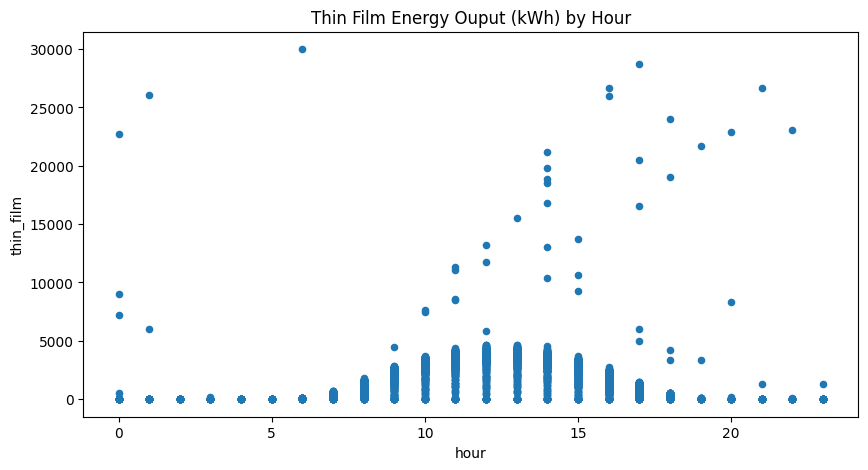

In [14]:
# Scatter plot for thin film energy output (kWh) by hour
energy.plot(kind = "scatter", x = "hour", y = "thin_film", title = "Thin Film Energy Ouput (kWh) by Hour", figsize = (10, 5))

<Axes: title={'center': 'Polycrystalline Energy Ouput (kWh) by Hour'}, xlabel='hour', ylabel='polycrystalline'>

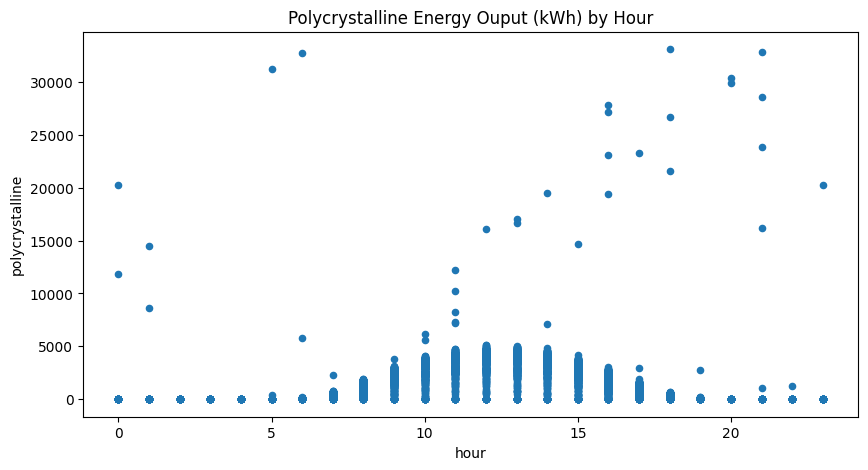

In [15]:
# Scatter plot for polycrystalline energy output (kWh) by hour
energy.plot(kind = "scatter", x = "hour", y = "polycrystalline", title = "Polycrystalline Energy Ouput (kWh) by Hour", figsize = (10, 5))

In [16]:
# Function to identify outliers using IQR
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df[column] < lower_bound) | (df[column] > upper_bound)

# Identify outliers
energy["thin_film_outlier"] = identify_outliers(energy, "thin_film")
energy["polycrystalline_outlier"] = identify_outliers(energy, "polycrystalline")

# Calculate the average energy by hour and month excluding outliers
hour_month_avg_thin_film = energy[~energy["thin_film_outlier"]].groupby(["hour", "month"])["thin_film"].mean().reset_index()
hour_month_avg_polycrystalline = energy[~energy["polycrystalline_outlier"]].groupby(["hour", "month"])["polycrystalline"].mean().reset_index()

# Rename columns for merging
hour_month_avg_thin_film.rename(columns = {"thin_film": "thin_film_avg"}, inplace = True)
hour_month_avg_polycrystalline.rename(columns = {"polycrystalline": "polycrystalline_avg"}, inplace = True)

# Merge the average values back to the original dataframe
energy = energy.merge(hour_month_avg_thin_film, on = ["hour", "month"], how = "left")
energy = energy.merge(hour_month_avg_polycrystalline, on = ["hour", "month"], how = "left")

# Replace outliers with the average values
energy.loc[energy["thin_film_outlier"], "thin_film"] = energy["thin_film_avg"]
energy.loc[energy["polycrystalline_outlier"], "polycrystalline"] = energy["polycrystalline_avg"]

# Drop the temporary columns
energy.drop(columns = ["thin_film_outlier", "thin_film_avg", "polycrystalline_outlier", "polycrystalline_avg"], inplace = True)

# Reset the index
energy.reset_index(drop = True, inplace = True)

## 2.6 Handle Missing Values for Thin Film and Polycrystalline Data
In the Handle Missing Values for Thin Film and Polycrystalline Data subsection, the initial 47 missing values in both Thin Film and Polycrystalline datasets were addressed by filling these gaps with the average of the values from the preceding and following weeks, based on the corresponding hour. Additionally, for instances where the sun elevation angle was below 0, the energy outputs for both Thin Film and Polycrystalline were set to 0. This adjustment reflects the fact that no solar energy is produced when the sun is below the horizon.


In [17]:
# Number of missing values before handling it
thin_film_before_mv = energy["thin_film"].isnull().sum()
polycrystalline_before_mv = energy["polycrystalline"].isnull().sum()

In [18]:
def fill_missing_energy(df, column_name):
    for index, row in df[df[column_name].isnull()].iterrows():
        week = row["week"]
        hour = row["hour"]

        # Calculate the average energy for the same hour in the previous week
        prev_week_avg = df[(df["week"] == week - 1) & (df["hour"] == hour)][column_name].mean()

        # Calculate the average energy for the same hour in the next week
        next_week_avg = df[(df["week"] == week + 1) & (df["hour"] == hour)][column_name].mean()

        # Fill the missing value with the average of the previous and next week's average
        df.at[index, column_name] = round((prev_week_avg + next_week_avg) / 2, 1)

    return df

# Fill missing values for thin film energy
energy = fill_missing_energy(energy, "thin_film")

# Fill missing values for polycrystalline energy
energy = fill_missing_energy(energy, "polycrystalline")

In [19]:
# If the sun elevation angle is below 0, no solar energy is being produced
energy.loc[energy["sun_elevation_angle"] < 0, ["thin_film", "polycrystalline"]] = 0

In [20]:
# Number of missing values after handling it
thin_film_after_mv = energy["thin_film"].isnull().sum()
polycrystalline_after_mv = energy["polycrystalline"].isnull().sum()

In [21]:
# Number of missing values before and after handling it
print(f"Number of missing values in Thin Film before handling is {thin_film_before_mv}")
print(f"Number of missing values in Thin Film after handling is {thin_film_after_mv}")
print("-" * 100)
print(f"Number of missing values in Polycrystalline before handling is {polycrystalline_before_mv}")
print(f"Number of missing values in Polycrystalline after handling is {polycrystalline_after_mv}")

Number of missing values in Thin Film before handling is 47
Number of missing values in Thin Film after handling is 0
----------------------------------------------------------------------------------------------------
Number of missing values in Polycrystalline before handling is 47
Number of missing values in Polycrystalline after handling is 0


In [22]:
# Statistical description after handling outlier and missing values
energy[["thin_film","polycrystalline"]].describe()

,thin_film,polycrystalline
count,8760.000000,8760.000000
mean,988.101990,1034.431138
std,1403.904301,1480.106653
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2064.000000,2148.000000
max,5012.000000,5088.000000


# 3. Exploratory Data Analysis
In the Exploratory Data Analysis section, the average hourly irradiation values for global horizontal irradiation, direct normal irradiation, and diffuse horizontal irradiation were calculated and analyzed. Scatter plots were used to visualize trends in the sun azimuth angle and sun elevation angle by the hour. A bar graph was created to compare the average monthly energy output for Thin Film and Polycrystalline technologies. Additionally, a heat map revealed a strong correlation between PV technology and factors such as global horizontal irradiation, direct normal irradiation, diffuse horizontal irradiation, sun elevation angle, and air temperature. The analysis also indicated an even stronger correlation between the two types of PV technology.

## 3.1 Average Hourly Irradiation (Wh/m²)

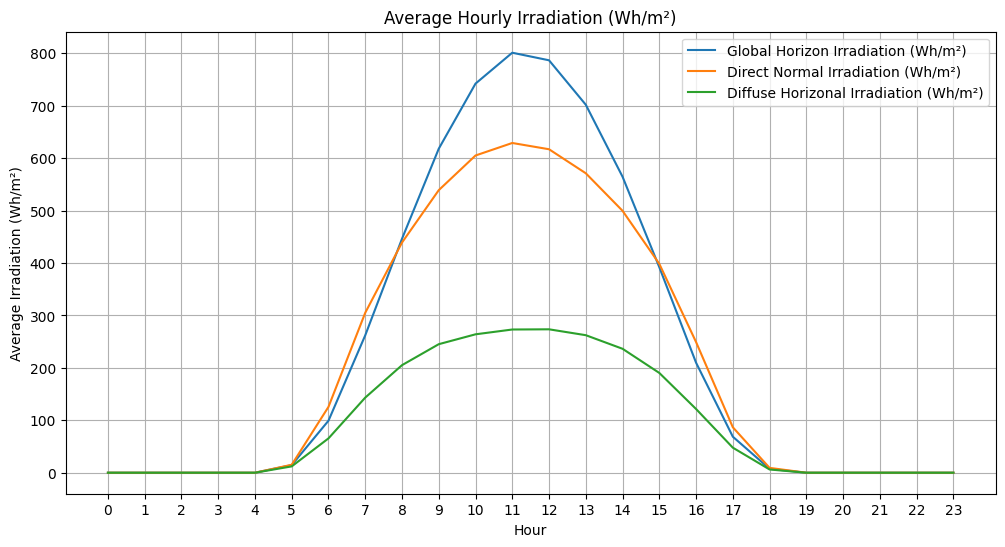

In [23]:
# Calculating the average of global horizon irradiation, direct normal irradiation, and diffuse horizonal irradiation
avg_irradiation_by_month = energy.groupby("hour")[["global_horizon_irradiation","direct_normal_irradiation","diffuse_horizonal_irradiation"]].mean().reset_index()

# Figure size
plt.figure(figsize = (12, 6))

# Plotting the line graph for three types of irradiations
plt.plot(avg_irradiation_by_month["hour"], avg_irradiation_by_month["global_horizon_irradiation"], label = "Global Horizon Irradiation (Wh/m²)")
plt.plot(avg_irradiation_by_month["hour"], avg_irradiation_by_month["direct_normal_irradiation"], label = "Direct Normal Irradiation (Wh/m²)")
plt.plot(avg_irradiation_by_month["hour"], avg_irradiation_by_month["diffuse_horizonal_irradiation"], label = "Diffuse Horizonal Irradiation (Wh/m²)")

# Plot labels
plt.xlabel("Hour")
plt.ylabel("Average Irradiation (Wh/m²)")
plt.title("Average Hourly Irradiation (Wh/m²)")
plt.grid(True)
plt.legend()
plt.xticks(np.arange(0, 24, 1))  # Ensuring all hours are shown on the x-axis
plt.show()

## 3.2 Sun Azimuth Angle by the Hour

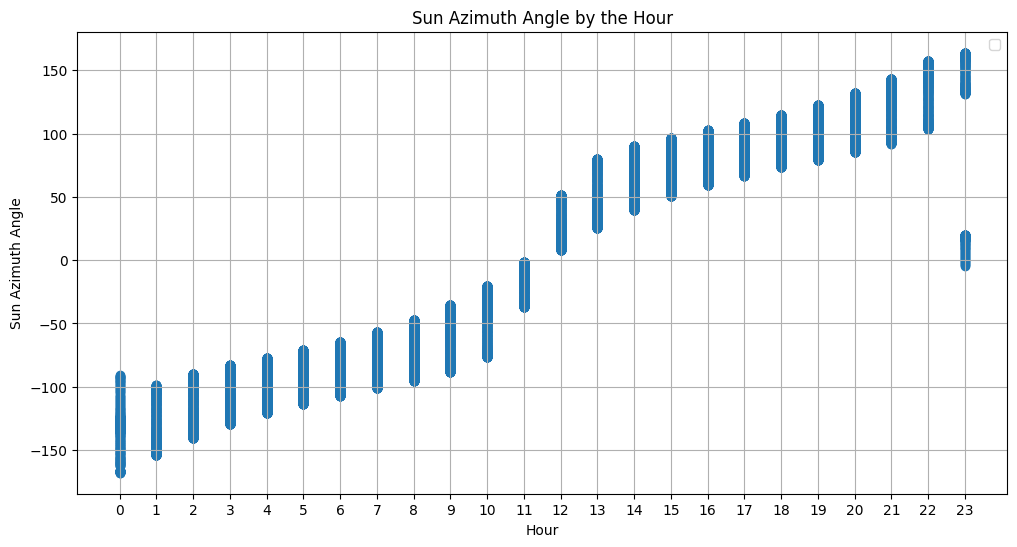

In [24]:
# Calculating the sun azimuth angle by the hour
sun_azimuth_angle_by_hour = energy[["hour","sun_azimuth_angle"]]

# Figure size
plt.figure(figsize = (12, 6))

# Plotting the scatter plot for sun azimuth angle by hour
plt.scatter(sun_azimuth_angle_by_hour["hour"], sun_azimuth_angle_by_hour["sun_azimuth_angle"])

# Plot labels
plt.xlabel("Hour")
plt.ylabel("Sun Azimuth Angle")
plt.title("Sun Azimuth Angle by the Hour")
plt.grid(True)
plt.legend()
plt.xticks(np.arange(0, 24, 1))  # Ensuring all hours are shown on the x-axis
plt.show()

## 3.3 Sun Elevation Angle by the Hour

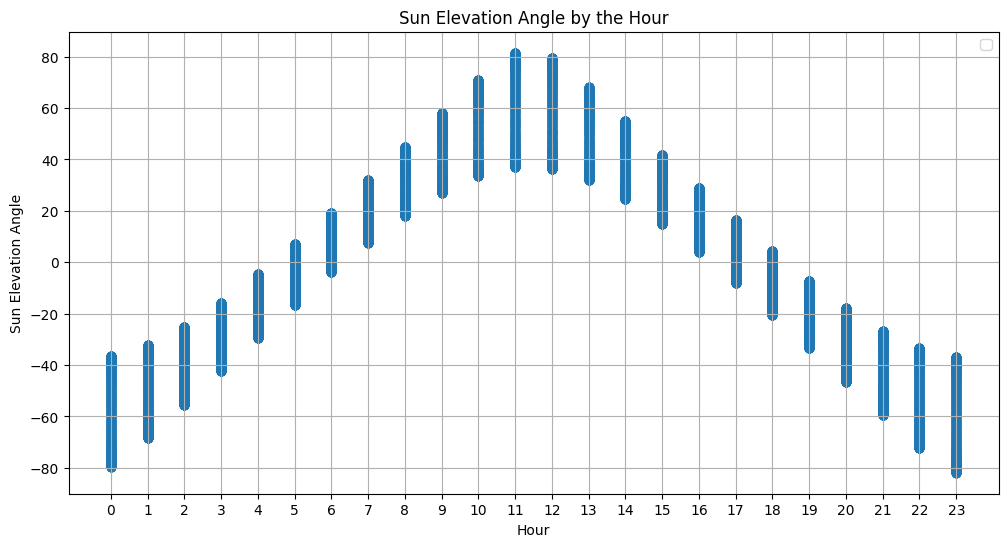

In [25]:
# Calculating the sun elevation angle by the hour
sun_elevation_angle_by_hour = energy[["hour","sun_elevation_angle"]]

# Figure size
plt.figure(figsize = (12, 6))

# Plotting the scatter plot for sun elevation angle by hour
plt.scatter(sun_elevation_angle_by_hour["hour"], sun_elevation_angle_by_hour["sun_elevation_angle"])

# Plot labels
plt.xlabel("Hour")
plt.ylabel("Sun Elevation Angle")
plt.title("Sun Elevation Angle by the Hour")
plt.grid(True)
plt.legend()
plt.xticks(np.arange(0, 24, 1))  # Ensuring all hours are shown on the x-axis
plt.show()

## 3.4 Thin Film Energy Output by the Month

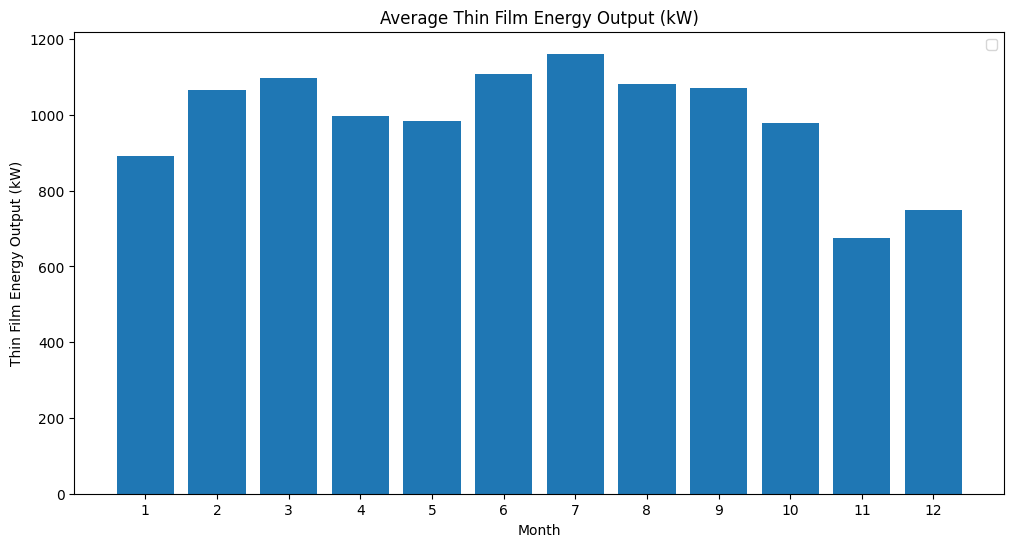

In [26]:
# Calculating the thin film energy output by the month
thin_film_by_month = energy.groupby("month")[["thin_film"]].mean().reset_index()

# Figure size
plt.figure(figsize = (12, 6))

# Plotting the bar plot for thin film energy output by the month
plt.bar(thin_film_by_month["month"], thin_film_by_month["thin_film"])

# Plot labels
plt.xlabel("Month")
plt.ylabel("Thin Film Energy Output (kW)")
plt.title("Average Thin Film Energy Output (kW)")
plt.legend()
plt.xticks(np.arange(1, 13, 1))  # Ensuring all months are shown on the x-axis
plt.show()

## 3.5 Polycrystalline Energy Output by the Month

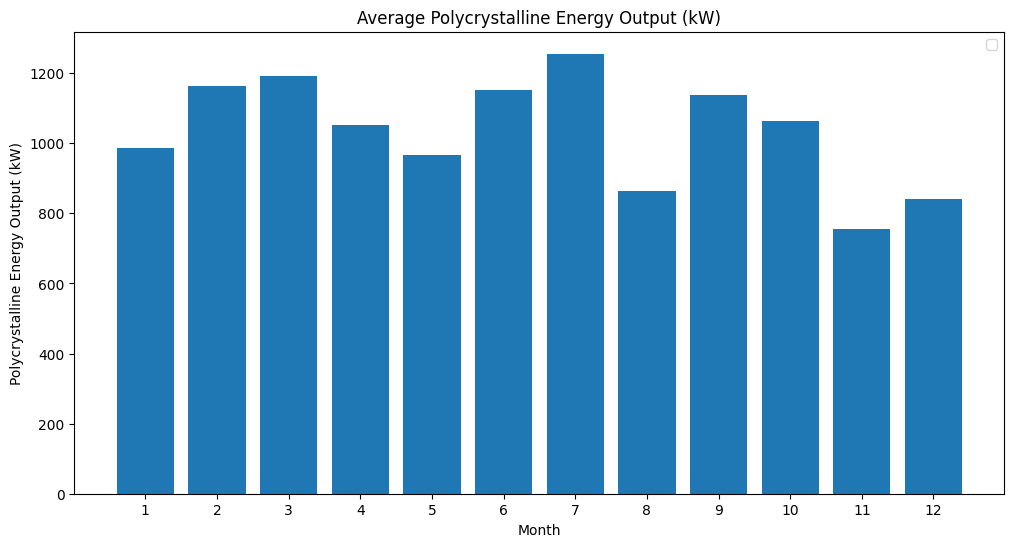

In [27]:
# Calculating the polycrystalline energy output by the month
polycrystalline_by_month = energy.groupby("month")[["polycrystalline"]].mean().reset_index()

# Figure size
plt.figure(figsize = (12, 6))

# Plotting the bar plot for polycrystalline energy output by the month
plt.bar(polycrystalline_by_month["month"], polycrystalline_by_month["polycrystalline"])

# Plot labels
plt.xlabel("Month")
plt.ylabel("Polycrystalline Energy Output (kW)")
plt.title("Average Polycrystalline Energy Output (kW)")
plt.legend()
plt.xticks(np.arange(1, 13, 1))  # Ensuring all months are shown on the x-axis
plt.show()

## 3.6 Heatmap

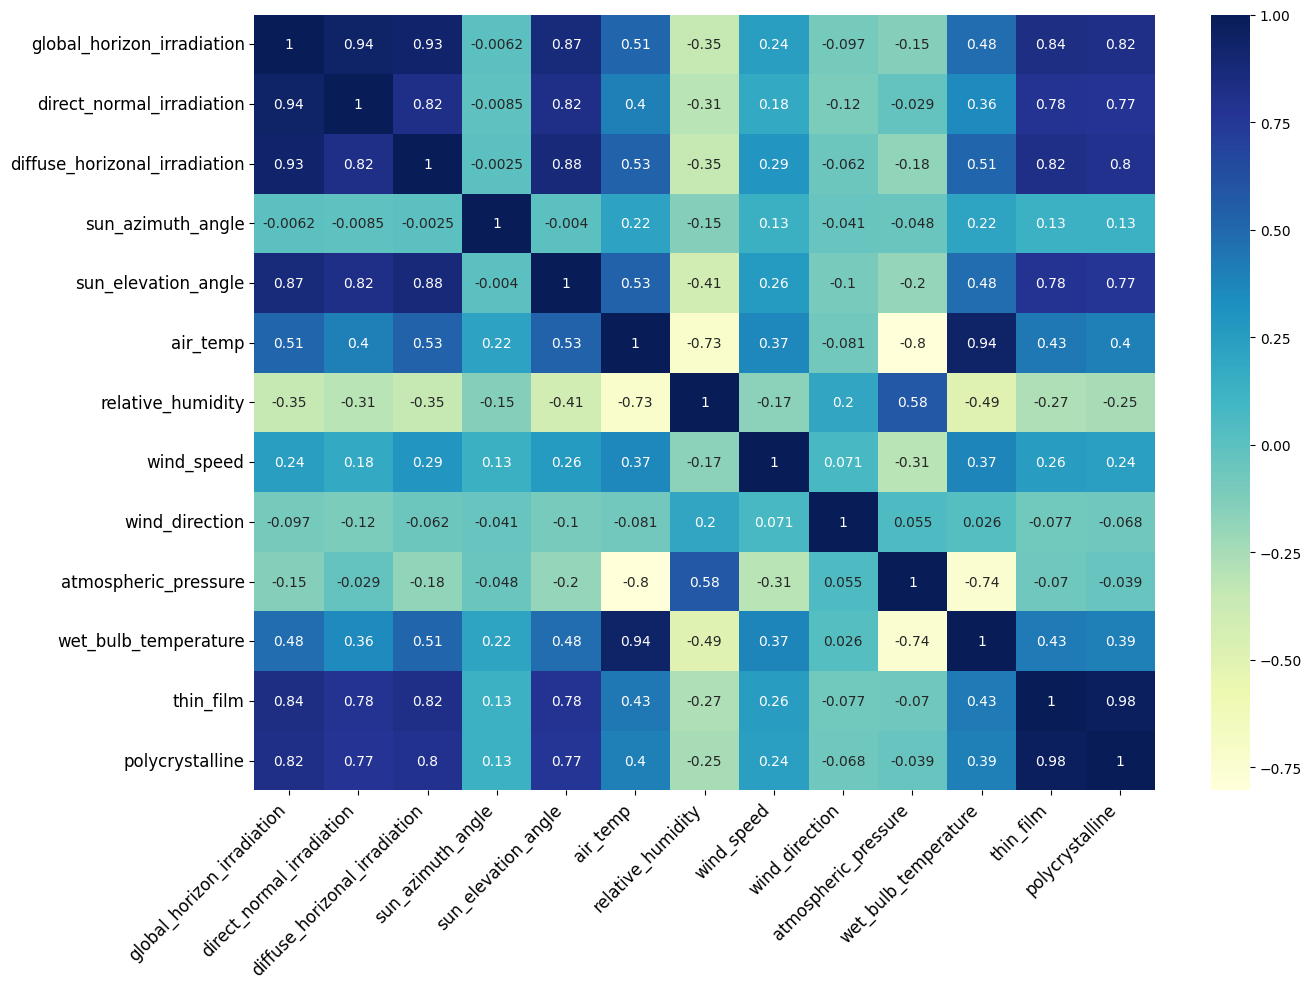

In [28]:
# Define correlation
correlation = energy[["global_horizon_irradiation", "direct_normal_irradiation","diffuse_horizonal_irradiation",
                    "sun_azimuth_angle","sun_elevation_angle","air_temp","relative_humidity", "wind_speed","wind_direction",
                    "atmospheric_pressure","wet_bulb_temperature", "thin_film","polycrystalline"]]

# Figure size
plt.figure(figsize = (14, 10))

# Plot labels
sns.heatmap(correlation.corr(), cmap = "YlGnBu", annot = True)
plt.xticks(rotation = 45, ha = "right", fontsize = 12)
plt.yticks(fontsize = 12)
plt.tight_layout()
plt.show()

# 4. Feature Engineering
In the Feature Engineering section, the following features were created:

- **Maintenance Periods:** Identified periods where both energy outputs are zero during the daytime with positive sun elevation.
- **Solar Declination:** Calculated based on the day of the year.
- **Solar Time:** Determined by adding the fraction of the hour represented by minutes to the hour.
- **Hour Angle:** Computed as the difference between solar time and solar noon.
- **Cosine of Solar Zenith Angle:** Derived from solar declination and hour angle, and clipped to the valid range.
- **Solar Zenith Angle:** Calculated from the cosine of the solar zenith angle.
- **Relative Air Mass:** Estimated based on the solar zenith angle and cosine of the solar zenith angle.
- **Wind Components:** Calculated the U (east-west) and V (north-south) components from wind speed and direction.

In [29]:
# Identify maintenance periods where both energy outputs are zero during the daytime
energy["maintenance"] = energy.apply(lambda row: 1 if row["sun_elevation_angle"] > 0 and 5 <= row["hour"] <= 19 and row["thin_film"] == 0 and row["polycrystalline"] == 0 else 0, axis = 1)

# Calculate the solar declination angle based on the day of the year
energy["solar_declination"] = 23.45 * np.sin(np.radians(360 / 365 * (energy["day_of_year"] - 81)))

# Calculate the solar time as the hour plus the fraction of the hour represented by minutes
energy["solar_time"] = energy["hour"] + (energy["minute"] / 60)

# Calculate the hour angle, which represents the difference between the solar time and solar noon (12 PM)
energy["hour_angle"] = 15 * (energy["solar_time"] - 12)

# Calculate the cosine of the solar zenith angle
energy["cos_theta_z"] = np.sin(np.radians(29.209900)) * np.sin(np.radians(energy["solar_declination"])) + \
                    np.cos(np.radians(29.209900)) * np.cos(np.radians(energy['solar_declination'])) * \
                    np.cos(np.radians(energy["hour_angle"]))

# Ensure the values of cos_theta_z are within the valid range [-1, 1]
energy["cos_theta_z"] = energy["cos_theta_z"].clip(-1, 1)

# Calculate the solar zenith angle in degrees
energy["solar_zenith_angle"] = np.degrees(np.arccos(energy["cos_theta_z"]))

# Calculate the relative air mass, which is a measure of the path length of sunlight through the atmosphere
energy["relative_air_mass"] = np.where(energy["cos_theta_z"] > 0,
                                   1 / (energy["cos_theta_z"] + 0.50572 * (96.07995 - energy["solar_zenith_angle"])**-1.6364),
                                   1)

# Calculate the wind components in the U (east-west) direction
energy["wind_u"] = energy["wind_speed"] * np.cos(np.radians(energy["wind_direction"]))

# Calculate the wind components in the V (north-south) direction
energy["wind_v"] = energy["wind_speed"] * np.sin(np.radians(energy["wind_direction"]))

In [30]:
# Reorder columns
cols = energy.columns.tolist()

# Move thin film and polycrystalline to the end
cols.append(cols.pop(cols.index("thin_film")))
cols.append(cols.pop(cols.index("polycrystalline")))
energy = energy[cols]

# 5. Model Building
In the Model Building section, the data was divided into training and testing sets, with months 1, 5, and 9 used for testing and the rest for training. Two XGBoost Regressor models were created for Thin Film and Polycrystalline energy outputs. XGBoost Regressor was selected because it handles complex relationships between weather variables and energy output well, is robust to noisy data, and shows which features are most important. It can be adapted for time-series data and works efficiently with large datasets.

## 5.1 Split Data

In [31]:
# Split the data into train and test
train = energy.loc[~energy["month"].isin([1, 5, 9])] # Training data does not includes months 1, 5, and 9
test = energy.loc[energy["month"].isin([1, 5, 9])]   # Testing data only includes months 1, 5, and 9

# Thin film train data
X_train_thin_film = train.iloc[:, :-2]
y_train_thin_film = train.iloc[:, -2]

# Thin film test data
X_test_thin_film = test.iloc[:, :-2]
y_test_thin_film = test.iloc[:, -2]

# Polycrystalline train data
X_train_polycrystalline = train.iloc[:, :-2]
y_train_polycrystalline = train.iloc[:, -1]

# Polycrystalline test data
X_test_polycrystalline = test.iloc[:, :-2]
y_test_polycrystalline = test.iloc[:, -1]

## 5.2 XGBoost Regressor Model Building for Thin Film

In [32]:
# Initialize the XGBoost Regressor
thin_film_xgb_reg = xgb.XGBRegressor(random_state = 42)

# Train the model
thin_film_xgb_reg.fit(X_train_thin_film, y_train_thin_film)

# Predict on the test set
y_predict_thin_film = thin_film_xgb_reg.predict(X_test_thin_film)

# Evaluate the model
mse = mean_squared_error(y_test_thin_film, y_predict_thin_film)
r2 = r2_score(y_test_thin_film, y_predict_thin_film)
mae = mean_absolute_error(y_test_thin_film, y_predict_thin_film)

# Print scores
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 196864.04928120182
R² Score: 0.9011617524656191
Mean Absolute Error: 212.44272132969968


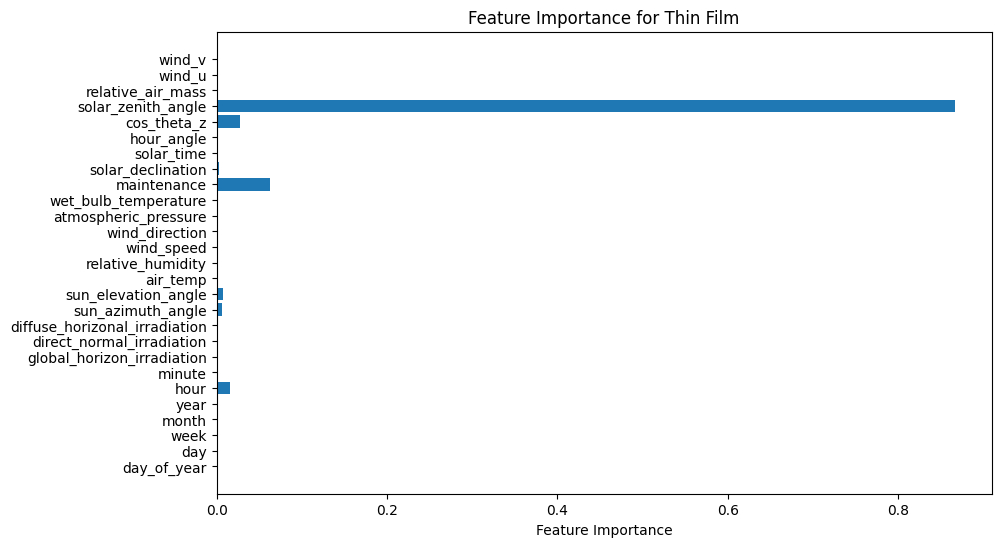

In [33]:
feature_importance = thin_film_xgb_reg.feature_importances_
feature_names = X_train_thin_film.columns

# Plot feature importance
plt.figure(figsize = (10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Thin Film")
plt.show()

## 5.3 XGBoost Regressor Model Building for Polycrystalline

In [34]:
# Initialize the XGBoost Regressor
polycrystalline_xgb_reg = xgb.XGBRegressor(random_state = 42)

# Train the model
polycrystalline_xgb_reg.fit(X_train_polycrystalline, y_train_polycrystalline)

# Predict on the test set
y_predict_polycrystalline = polycrystalline_xgb_reg.predict(X_test_polycrystalline)

# Evaluate the model
mse = mean_squared_error(y_test_polycrystalline, y_predict_polycrystalline)
r2 = r2_score(y_test_polycrystalline, y_predict_polycrystalline)
mae = mean_absolute_error(y_test_polycrystalline, y_predict_polycrystalline)

# Print scores
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 209117.56748804974
R² Score: 0.9060769470509638
Mean Absolute Error: 219.48260140559987


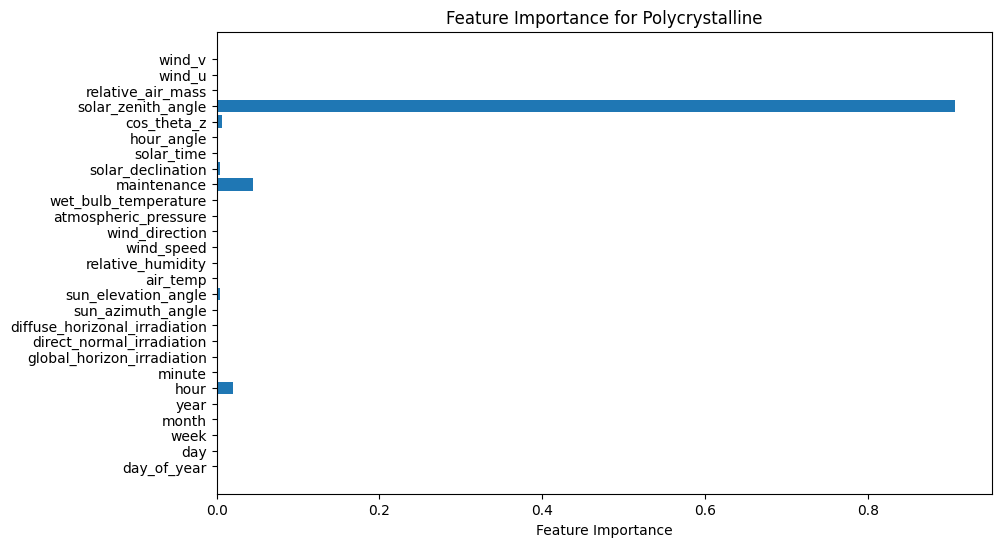

In [35]:
feature_importance = polycrystalline_xgb_reg.feature_importances_
feature_names = X_train_polycrystalline.columns

# Plot feature importance
plt.figure(figsize = (10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Polycrystalline")
plt.show()

# 6. Model Evaluation
In the Model Evaluation section, hyperparameter tuning was applied to both models to enhance their performance. Consequently, improvements were observed in the Mean Squared Error, R² Score, and Mean Absolute Error. Each study involved a total of 500 trials.








## 6.1 Hyperparameter Tuning for Thin Film Using XGBoost Regressor

In [36]:
# Define the objective function
def objective(trial):
    # Define the search space for hyperparameters
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 50, 200),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),
        "random_state": trial.suggest_int("random_state", 0, 10)
    }

    # Create the regressor with the suggested hyperparameters
    thin_film_xgb_reg = XGBRegressor(**params)

    # Train the model
    thin_film_xgb_reg.fit(X_train_thin_film, y_train_thin_film)

    # Predict on the validation set
    y_predict_thin_film = thin_film_xgb_reg.predict(X_test_thin_film)

    # Calculate and return the mean absolute error
    mae = mean_absolute_error(y_test_thin_film, y_predict_thin_film)

    return mae

In [37]:
study_thin_film = optuna.create_study(direction = "minimize")

[I 2024-08-08 20:11:41,394] A new study created in memory with name: no-name-e87dbd53-4a51-4086-948d-dcac746971fa


In [38]:
study_thin_film.optimize(objective, n_trials = 500)

[I 2024-08-08 20:11:43,253] Trial 0 finished with value: 200.79056828839745 and parameters: {'learning_rate': 0.03573027485072672, 'n_estimators': 199, 'subsample': 0.9449870665584745, 'max_depth': 11, 'min_child_weight': 9, 'gamma': 2.5387439392458813, 'colsample_bytree': 0.6315280475525669, 'reg_alpha': 2.9893968306785546, 'reg_lambda': 0.18393341129007312, 'random_state': 8}. Best is trial 0 with value: 200.79056828839745.
[I 2024-08-08 20:11:43,509] Trial 1 finished with value: 208.10052742199775 and parameters: {'learning_rate': 0.03923050267527041, 'n_estimators': 178, 'subsample': 0.9951729542428847, 'max_depth': 3, 'min_child_weight': 6, 'gamma': 3.628143405232964, 'colsample_bytree': 0.5127911693906566, 'reg_alpha': 0.5132969949847965, 'reg_lambda': 1.9439623103234376, 'random_state': 6}. Best is trial 0 with value: 200.79056828839745.
[I 2024-08-08 20:11:49,452] Trial 2 finished with value: 202.2685902222206 and parameters: {'learning_rate': 0.12247650464687496, 'n_estimators

In [39]:
# Access the best params
best_params = study_thin_film.best_params
print(best_params)

# Access the best score
best_score = study_thin_film.best_value
print("Best score:", best_score)

{'learning_rate': 0.04381984739504477, 'n_estimators': 152, 'subsample': 0.7123317576248149, 'max_depth': 8, 'min_child_weight': 9, 'gamma': 0.3395868011289114, 'colsample_bytree': 0.9820539063700411, 'reg_alpha': 4.220286168136016, 'reg_lambda': 2.829225984814449, 'random_state': 8}
Best score: 170.52968536819796


In [40]:
# Initialize the XGBoost Regressor
thin_film_xgb_reg = xgb.XGBRegressor(**best_params)

# Train the model
thin_film_xgb_reg.fit(X_train_thin_film, y_train_thin_film)

# Predict on the test set
y_predict_thin_film = thin_film_xgb_reg.predict(X_test_thin_film)

# Evaluate the model
mse = mean_squared_error(y_test_thin_film, y_predict_thin_film)
r2 = r2_score(y_test_thin_film, y_predict_thin_film)
mae = mean_absolute_error(y_test_thin_film, y_predict_thin_film)

# Print scores
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 156726.8633338991
R² Score: 0.9213131672845146
Mean Absolute Error: 170.52968536819796


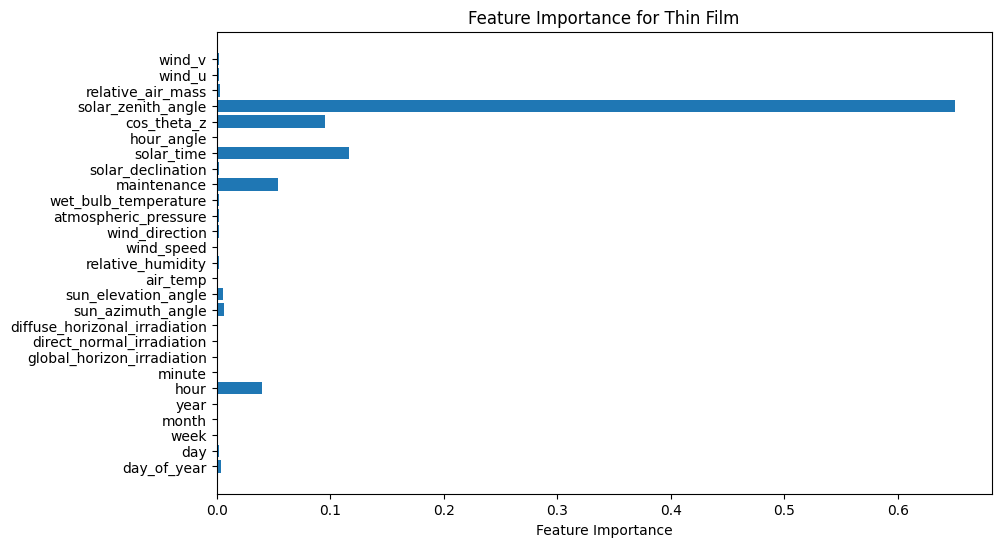

In [41]:
feature_importance = thin_film_xgb_reg.feature_importances_
feature_names = X_train_thin_film.columns

# Plot feature importance
plt.figure(figsize = (10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Thin Film")
plt.show()

## 6.2 Hyperparameter Tuning for Polycrystalline Using XGBoost Regressor

In [42]:
# Define the objective function
def objective(trial):
    # Define the search space for hyperparameters
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 1.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 50, 200),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "max_depth": trial.suggest_int("max_depth", 3, 20),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0.0, 5.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 5.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 5.0),
        "random_state": trial.suggest_int("random_state", 0, 10)
    }

    # Create the regressor with the suggested hyperparameters
    polycrystalline_xgb_reg = XGBRegressor(**params)

    # Train the model
    polycrystalline_xgb_reg.fit(X_train_polycrystalline, y_train_polycrystalline)

    # Predict on the validation set
    y_predict_polycrystalline = polycrystalline_xgb_reg.predict(X_test_polycrystalline)

    # Calculate and return the mean absolute error
    mae = mean_absolute_error(y_test_polycrystalline, y_predict_polycrystalline)

    return mae

In [43]:
study_polycrystalline = optuna.create_study(direction = "minimize")

[I 2024-08-08 20:24:33,350] A new study created in memory with name: no-name-3a9f91ad-1e9d-495e-baeb-a0de02e5b921


In [44]:
study_polycrystalline.optimize(objective, n_trials = 500)

[I 2024-08-08 20:24:37,500] Trial 0 finished with value: 383.2093301195116 and parameters: {'learning_rate': 0.02016123686702438, 'n_estimators': 90, 'subsample': 0.812728962071011, 'max_depth': 15, 'min_child_weight': 9, 'gamma': 2.6056474256422995, 'colsample_bytree': 0.6298822744911439, 'reg_alpha': 0.1197287600829211, 'reg_lambda': 4.769667936164461, 'random_state': 3}. Best is trial 0 with value: 383.2093301195116.
[I 2024-08-08 20:24:39,167] Trial 1 finished with value: 224.7498218539439 and parameters: {'learning_rate': 0.04516933635515654, 'n_estimators': 195, 'subsample': 0.933708535595649, 'max_depth': 13, 'min_child_weight': 10, 'gamma': 4.13458518558398, 'colsample_bytree': 0.5537353505266696, 'reg_alpha': 3.7584917252986196, 'reg_lambda': 3.731544656222815, 'random_state': 1}. Best is trial 1 with value: 224.7498218539439.
[I 2024-08-08 20:24:40,066] Trial 2 finished with value: 213.8690272431807 and parameters: {'learning_rate': 0.07821304263300352, 'n_estimators': 74, 's

In [45]:
# Access the best params
best_params = study_polycrystalline.best_params
print(best_params)

# Access the best score
best_score = study_polycrystalline.best_value
print("Best score:", best_score)

{'learning_rate': 0.034749732922119365, 'n_estimators': 182, 'subsample': 0.8385421014070766, 'max_depth': 7, 'min_child_weight': 6, 'gamma': 3.7016243688870443, 'colsample_bytree': 0.9910100849948432, 'reg_alpha': 4.546478864513753, 'reg_lambda': 0.12605862221391012, 'random_state': 0}
Best score: 191.71463428331685


In [46]:
# Initialize the XGBoost Regressor
polycrystalline_xgb_reg = xgb.XGBRegressor(**best_params)

# Train the model
polycrystalline_xgb_reg.fit(X_train_polycrystalline, y_train_polycrystalline)

# Predict on the test set
y_predict_polycrystalline = polycrystalline_xgb_reg.predict(X_test_polycrystalline)

# Evaluate the model
mse = mean_squared_error(y_test_polycrystalline, y_predict_polycrystalline)
r2 = r2_score(y_test_polycrystalline, y_predict_polycrystalline)
mae = mean_absolute_error(y_test_polycrystalline, y_predict_polycrystalline)

# Print scores
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 189294.7710199645
R² Score: 0.9149801567842939
Mean Absolute Error: 191.71463428331685


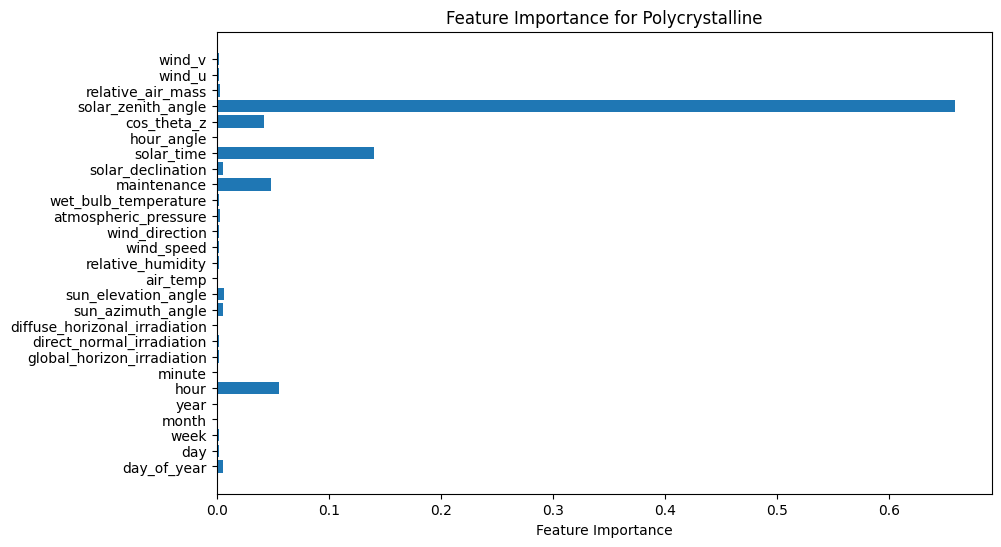

In [47]:
feature_importance = polycrystalline_xgb_reg.feature_importances_
feature_names = X_train_polycrystalline.columns

# Plot feature importance
plt.figure(figsize = (10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Polycrystalline")
plt.show()

# 7. Conclusion









## 7.1 Evaluation of Thin Film Model Performance

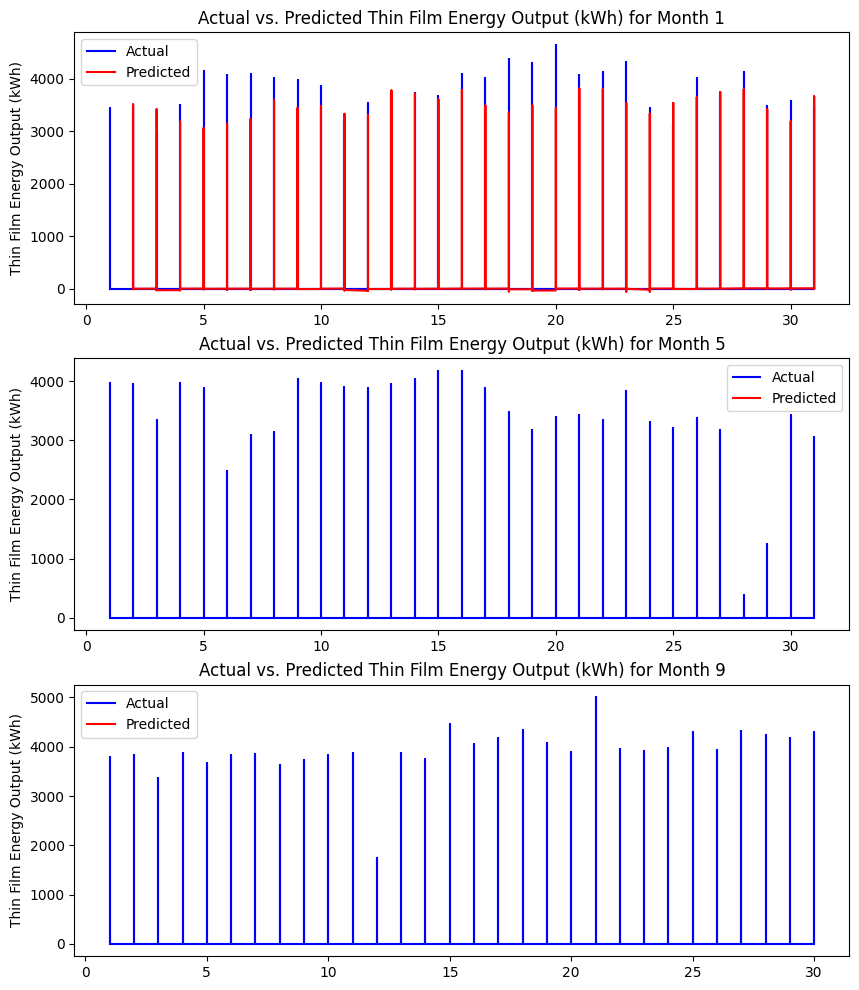

In [73]:
# Create a figure with 3 subplots in a 3 x 1 grid, with specific size (10 x 12 inches)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (10, 12))

# Convert y_predict_thin_film from numpy.ndarray to pandas.core.series.Series
y_predict_thin_film = pd.Series(y_predict_thin_film, name = "y_predict_thin_film")

# Define thin film actual and predictive energy output
thin_film_actual_and_predictive = pd.concat([X_test_thin_film, y_test_thin_film, y_predict_thin_film], axis = 1)

# Define thin film for months 1, 5, and 9
thin_film_month_1 = thin_film_actual_and_predictive.query("month == 1")
thin_film_month_5 = thin_film_actual_and_predictive.query("month == 5")
thin_film_month_9 = thin_film_actual_and_predictive.query("month == 9")

# Plot for month 1
ax1.plot(thin_film_month_1["day"], thin_film_month_1["thin_film"], color = "blue", label = "Actual")
ax1.plot(thin_film_month_1["day"], thin_film_month_1["y_predict_thin_film"], color = "red", label = "Predicted")
ax1.set_ylabel("Thin Film Energy Output (kWh)")
ax1.set_title("Actual vs. Predicted Thin Film Energy Output (kWh) for Month 1")
ax1.legend(loc = "upper left")

# Plot for month 5
ax2.plot(thin_film_month_5["day"], thin_film_month_5["thin_film"], color = "blue", label = "Actual")
ax2.plot(thin_film_month_5["day"], thin_film_month_5["y_predict_thin_film"], color = "red", label = "Predicted")
ax2.set_ylabel("Thin Film Energy Output (kWh)")
ax2.set_title("Actual vs. Predicted Thin Film Energy Output (kWh) for Month 5")
ax2.legend(loc = "upper right")

# Plot for month 9
ax3.plot(thin_film_month_9["day"], thin_film_month_9["thin_film"], color = "blue", label = "Actual")
ax3.plot(thin_film_month_9["day"], thin_film_month_9["y_predict_thin_film"], color = "red", label = "Predicted")
ax3.set_ylabel("Thin Film Energy Output (kWh)")
ax3.set_title("Actual vs. Predicted Thin Film Energy Output (kWh) for Month 9")
ax3.legend(loc = "upper left")

## 7.2 Evaluation of Polycrystalline Model Performance

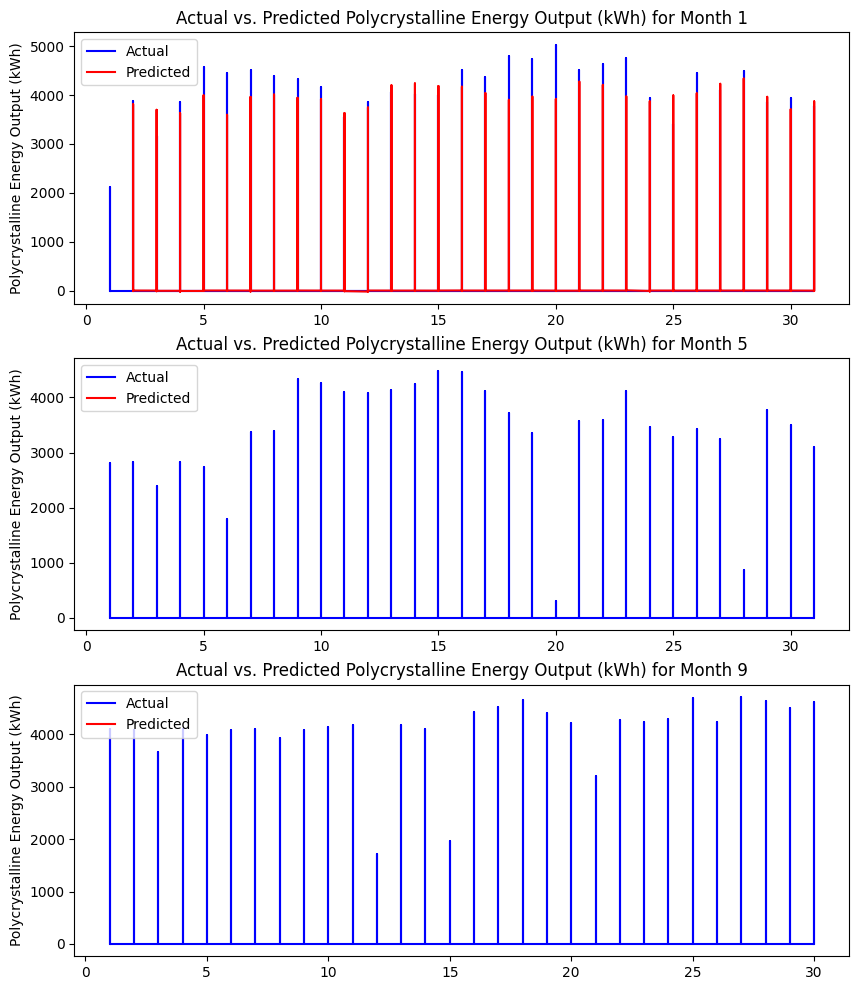

In [74]:
# Create a figure with 3 subplots in a 3 x 1 grid, with specific size (10 x 12 inches)
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (10, 12))

# Convert y_predict_polycrystalline from numpy.ndarray to pandas.core.series.Series
y_predict_polycrystalline = pd.Series(y_predict_polycrystalline, name = "y_predict_polycrystalline")

# Define polycrystalline actual and predictive energy output
polycrystalline_actual_and_predictive = pd.concat([X_test_polycrystalline, y_test_polycrystalline, y_predict_polycrystalline], axis = 1)

# Define polycrystalline for months 1, 5, and 9
polycrystalline_month_1 = polycrystalline_actual_and_predictive.query("month == 1")
polycrystalline_month_5 = polycrystalline_actual_and_predictive.query("month == 5")
polycrystalline_month_9 = polycrystalline_actual_and_predictive.query("month == 9")

# Plot for month 1
ax1.plot(polycrystalline_month_1["day"], polycrystalline_month_1["polycrystalline"], color = "blue", label = "Actual")
ax1.plot(polycrystalline_month_1["day"], polycrystalline_month_1["y_predict_polycrystalline"], color = "red", label = "Predicted")
ax1.set_ylabel("Polycrystalline Energy Output (kWh)")
ax1.set_title("Actual vs. Predicted Polycrystalline Energy Output (kWh) for Month 1")
ax1.legend(loc = "upper left")

# Plot for month 5
ax2.plot(polycrystalline_month_5["day"], polycrystalline_month_5["polycrystalline"], color = "blue", label = "Actual")
ax2.plot(polycrystalline_month_5["day"], polycrystalline_month_5["y_predict_polycrystalline"], color = "red", label = "Predicted")
ax2.set_ylabel("Polycrystalline Energy Output (kWh)")
ax2.set_title("Actual vs. Predicted Polycrystalline Energy Output (kWh) for Month 5")
ax2.legend(loc = "upper left")

# Plot for month 9
ax3.plot(polycrystalline_month_9["day"], polycrystalline_month_9["polycrystalline"], color = "blue", label = "Actual")
ax3.plot(polycrystalline_month_9["day"], polycrystalline_month_9["y_predict_polycrystalline"], color = "red", label = "Predicted")
ax3.set_ylabel("Polycrystalline Energy Output (kWh)")
ax3.set_title("Actual vs. Predicted Polycrystalline Energy Output (kWh) for Month 9")
ax3.legend(loc = "upper left")

## 7.3 Final Thoughts and Potential For Further Improvements
| Model             | Metric                          | Initial                | Final (With Hyperparameter Tuning) |
|-------------------|---------------------------------|------------------------|-------------------------------------|
| **Thin Film**      | **Mean Squared Error (MSE)**    | 196,864.05             | 156,726.86                          |
|                   | **R² Score**                    | 0.9012                 | 0.9213                              |
|                   | **Mean Absolute Error (MAE)**   | 212.44                 | 170.53                              |
| **Polycrystalline**| **Mean Squared Error (MSE)**    | 209,117.57             | 189,294.77                          |
|                   | **R² Score**                    | 0.9061                 | 0.9150                              |
|                   | **Mean Absolute Error (MAE)**   | 219.48                 | 191.71                              |


The table presents the performance metrics of the XGBoost Regressor models for Thin Film and Polycrystalline before and after hyperparameter tuning. For Thin Film, hyperparameter tuning resulted in an improvement in the R² Score from 0.9012 to 0.9213, along with a reduction in Mean Absolute Error (MAE) from 212.44 to 170.53. Similarly, for Polycrystalline, the R² Score increased from 0.9061 to 0.9150, and the MAE decreased from 219.48 to 191.71. Furthermore, the Mean Squared Error (MSE) for both models showed significant improvement. These outcomes demonstrate the positive impact of hyperparameter tuning on model accuracy and the reduction of error metrics.

Furthermore, the model could benefit from additional data. For instance, using a 5-year dataset where 3 years are allocated for training and 2 years for testing could potentially lead to even better performance.